# The Post Correspondance Problem

---

In this notebook you will find an introduction to the Post Correspondance Problem, and the Bounded Post Correspondance Problem. The notebook also features Python code that will solve the Bounded Post Correspondance Problem and an explanation to what an undecidable problem is in computability theory.

## What Is The Post Correspondance Problem?

https://en.wikipedia.org/wiki/Post_correspondence_problem

The Post Correspondance Problem, which I will often refer to by PCP, is a problem introduced by Emil Post in 1946. It is an early example of an undecidable problem. I will demonstrate the problem below.

In [1]:
#Given two lists 1 and 2 where:
L1 = {"B", "A", "CA", "ABC"}
L2 = {"CA", "AB", "A", "C"}

The aim to find a sequence of these lists so that te strings are the exact same. For example the sequence 1,2,3 would give "BACA" in L1 but would give "CAABA" in L2. These are not the same strings.

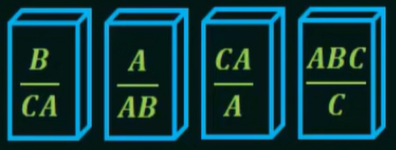

It may be easier to imagine the lists as tiles.

Looking at the tiles you can already rule some options out for starting the list. This is because the upper and lower value must begin with the same letter as to begin a corresponding string. So we already know that tile 1, 3, and 4 are not the first domino to be used. This leaves us beginning with tile 2.

Currently out two strings are looking like this:

In [2]:
S1 = "A-"
S2 = "AB-"

I have added hyphons to seperate out the values to depict which values are coming from which tile. This is only for visual aid and can be ignored when trying ot match the strings.

S2 now has an extra value to S1, a 'B'. To match these strings we must now add a 'B' to S1 next. The only option is tile 1. So now our strings are as follows:

In [3]:
S1 = "A-B"
S2 = "AB-CA"

Now to match the extra 'CA' in S2 we must add tile 3 to the strings.

In [4]:
S1 = "A-B-CA"
S2 = "AB-CA-A"

To match S2's extra 'A' we can add tile 2 again.

In [5]:
S1 = "A-B-CA-A"
S2 = "AB-CA-A-AB"

Now for the final tile, we can tile 4 to match S2's extra 'AB'.

In [6]:
S1 = "A-B-CA-A-ABC"
S2 = "AB-CA-A-AB-C"

We can see now that both strings are made up of "ABCAAABC". Thus we have found a solution to the PCP in this set of lists.

# The Bounded Post Correspondance Problem

---

## What Is The Bounded Post Correspondance Problem?

The Bounded Post Correspondance Problem is a variation of the Post Correspondance Problem in which you must find a corresponding string in less than or equal to 'k' tiles(this includes repeated tiles).

One method of solving the Bounded Post Correspondance Problem is through a brute force search. However, this is not efficient as it solves the problem in a time complexity of $O(2^k)$.

In [7]:
import itertools as it

L1 = {"B", "A", "CA", "ABC"}
L2 = {"CA", "AB", "A", "C"}

We will use the same lists as before. First we must find the cartesian product of these two lists. This is the set of all ordered pairs of elements from L1 and L2. 
Notated as: $L1 × L2 = {(x, y) : x ∈ L1, y ∈ L2}$

As an example the two sets A and B where A = {1, 2} and B = {5, 6, 7}, then the cartesian product is equal to {(1,5), {1,6}, (1,7), (2,5), {2,6}, (2,7)}

In [39]:
#Cartesian product solver where Ln is a list and k is the maximm amount of tiles allowed to use.
def cartesian_product_solver(Ln, k):
    cartesian_product = []
    
    for i in range(1, k + 1):
        for j in it.product(Ln, repeat = i):
            formatted = ''.join(j)
            cartesian_product.append(formatted)
    return cartesian_product
    

This function allows us to calculate the cartesian product of a list. It returns all possible combinations of the list using up to 'k' values. So if 'k' is three then this function will produce all one value, two value, and three value combinations of the list.

In [44]:
#Returns boolean value if L1 and L2 correspond
def correspond(L1, L2, k):
    if len(L1) != len(L2):
        return False
    for list1, list2 in zip(cartesian_product_solver(L1, k), cartesian_product_solver(L2, k)):
        if list1 == list2:
            print("Solution to problem found!")
            return True
    print("No solution found...")    
    return False
    

The function *correspond* takes in two lists and a value 'k'. It then loops through the cartesian products of the lists and checks if a corresponding string is found. If one is found, it returns a message saying "Solution to problem found!" and returns True. If it does not find any corresponding strings then it returns a message "No solution found..." and also returns False.

In [45]:
def bpcp_solver(L1, L2, K):
    if correspond(L1, L2, K):
        return True
    else:
        return False

Function *bpcp_solver* also takes in two lists and a value of 'k'. It then checks these using the *correspond* function and returns true or false.

Testing the *bpcp_solver* function:

In [46]:
#These should correspond when k = 4 or above. Will not correspond with anything less than 4.
L3 = ['a', 'ab', 'bba']
L4 = ['baa', 'aa', 'bb']

In [54]:
print(bpcp_solver(L3, L4, 4))

Solution to problem found!
True


In [55]:
print(bpcp_solver(L3, L4, 3))

No solution found...
False


# What Is An Undecidable Problem?

---

A problem is described as decidable if an algorithm can be constructed to answer the problem correctly. An example of a deciable problem is computing all prime numbers in the range of 0 - 100. An algorithm can be made to to this as follows: 

In [59]:
# Taken from (https://www.codegrepper.com/code-examples/python/how+to+get+prime+numbers+in+a+range+in+python)
n = 100
primes = []

for i in range(2, n + 1):
    for j in range(2, int(i ** 0.5) + 1):
        if i%j == 0:
            break
    else:
        primes.append(i)

print(primes)


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Thus the problem is deemed decidable.

An undecidable problem is a problem where no algorithm can be constructed to answer the problem correctly in a finite amount of time. Undecidable problems may be partially decidable, but there will always be a condition that will lead the Turing machine into an infinite loop with providing a correct answer.

The Post Correspondance Proble is a famous example of an undeciable problem. 

## References

[[1] Post Correspondance Problem](https://en.wikipedia.org/wiki/Post_correspondence_problem)

[[2] Theory of Algorithms LearnOnline Page](https://learnonline.gmit.ie/course/view.php?id=5197)

[[3] Computing Prime Numbers in Python](https://www.codegrepper.com/code-examples/python/how+to+get+prime+numbers+in+a+range+in+python)

[[4] Decidable and Undecidable problems in Theory of Computation](https://www.geeksforgeeks.org/decidable-and-undecidable-problems-in-theory-of-computation/)